# Explore the dataset


In this notebook, we will perform an EDA (Exploratory Data Analysis) on the processed Waymo dataset (data in the `processed` folder). In the first part, you will create a function to display 

In [1]:
from utils import get_dataset
from utils import parse_frame
import glob
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import tensorflow as tf
from waymo_open_dataset import dataset_pb2 as open_dataset
from waymo_open_dataset.utils import frame_utils
from waymo_open_dataset.utils import transform_utils
import tensorflow.compat.v1 as tf
from object_detection.inputs import train_input
from object_detection.protos import input_reader_pb2

%matplotlib inline

In [3]:
path='/home/workspace/data/train/*.tfrecord'

dataset = get_dataset(path)

INFO:tensorflow:Reading unweighted datasets: ['/home/workspace/data/train/*.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['/home/workspace/data/train/*.tfrecord']
INFO:tensorflow:Number of filenames to read: 86


## Write a function to display an image and the bounding boxes

Implement the `display_images` function below. This function takes a batch as an input and display an image with its corresponding bounding boxes. The only requirement is that the classes should be color coded (eg, vehicles in red, pedestrians in blue, cyclist in green).

In [4]:
def display_images(batch):
    # TODO - Your implementation here
    imgBatch= batch['image'].numpy()
    bbBatch= batch['groundtruth_boxes'].numpy()
    classBatch= batch['groundtruth_classes'].numpy()
    batchSize=bbBatch.shape[0]
    colormap={1: [1, 0, 0], 2: [0, 1, 0], 4: [0, 0, 1]}
    i=0
    f, ax =plt.subplots(nrows=1,ncols=1,figsize=(20,10))
    for img in imgBatch:
        ax.imshow(img)
        width =img.shape[0]
        height =img.shape[1]
        for cl, bb in zip(classBatch[i], bbBatch[i]):
            y1, x1, y2, x2 = bb
            x1,x2=x1*width,x2*width
            y1,y2=y1*height,y2*height
            rec= patches.Rectangle((x1, y1), x2-x1, y2-y1, facecolor='none', edgecolor=colormap[cl])
            ax.add_patch(rec)
        ax.axis('off')
        i=i+1
    plt.tight_layout()
    plt.show()    
    pass

## Display 10 images 

Using the dataset created in the second cell and the function you just coded, display 10 random images with the associated bounding boxes. You can use the methods `take` and `shuffle` on the dataset.

## Additional EDA

In this last part, you are free to perform any additional analysis of the dataset. What else would like to know about the data?
For example, think about data distribution. So far, you have only looked at a single file...

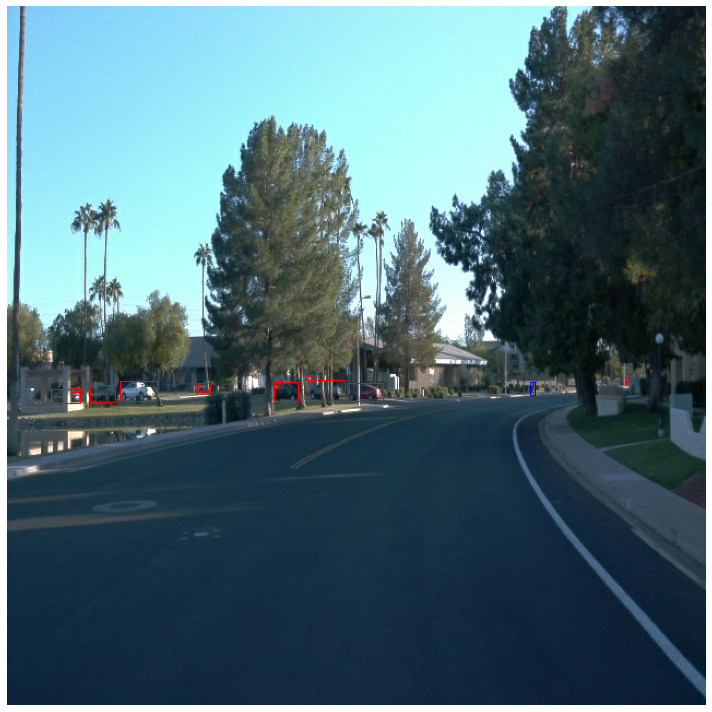

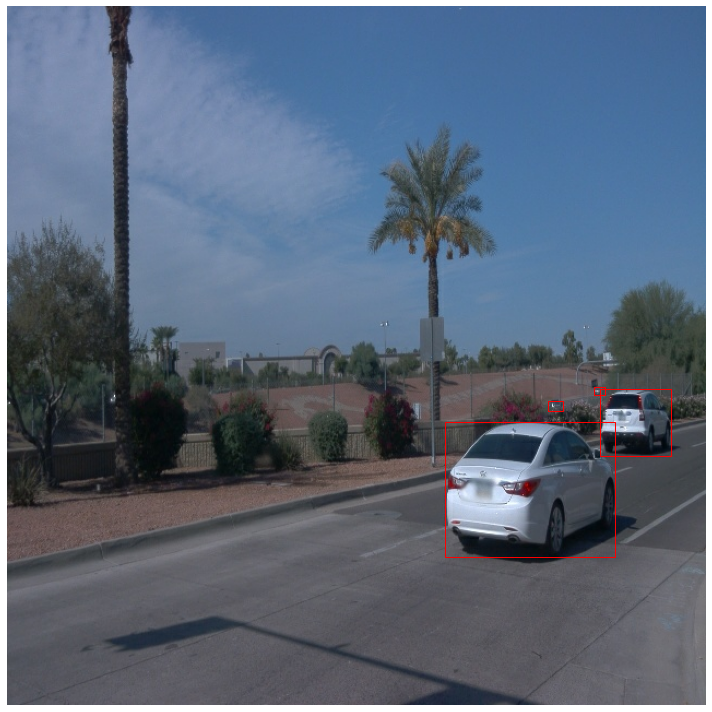

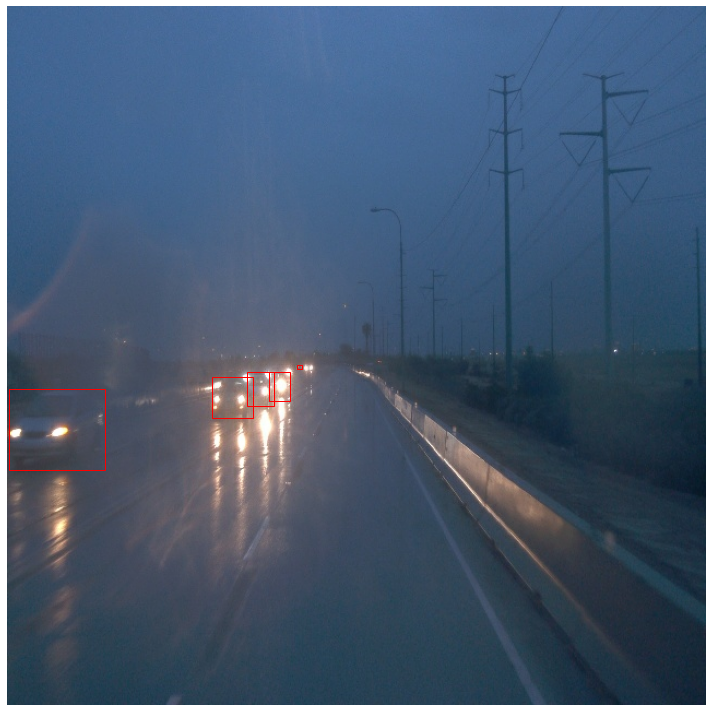

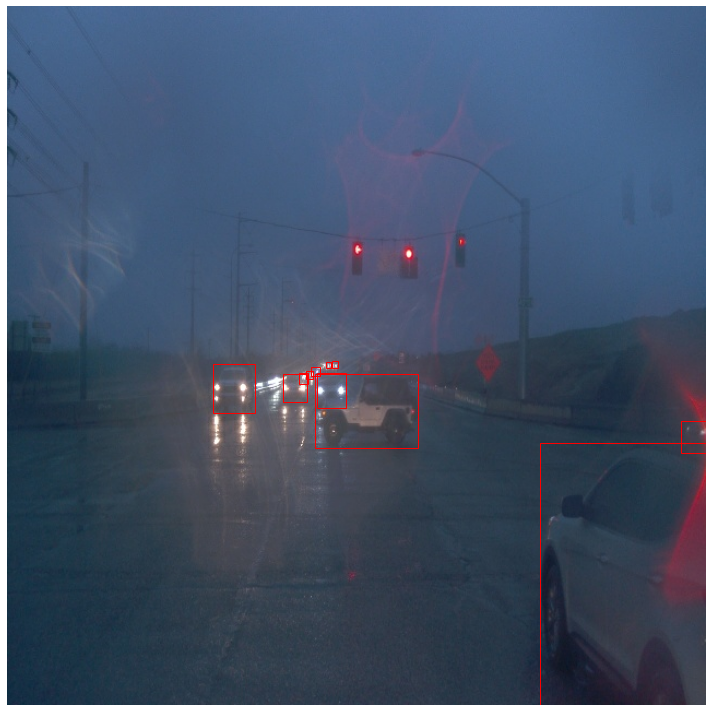

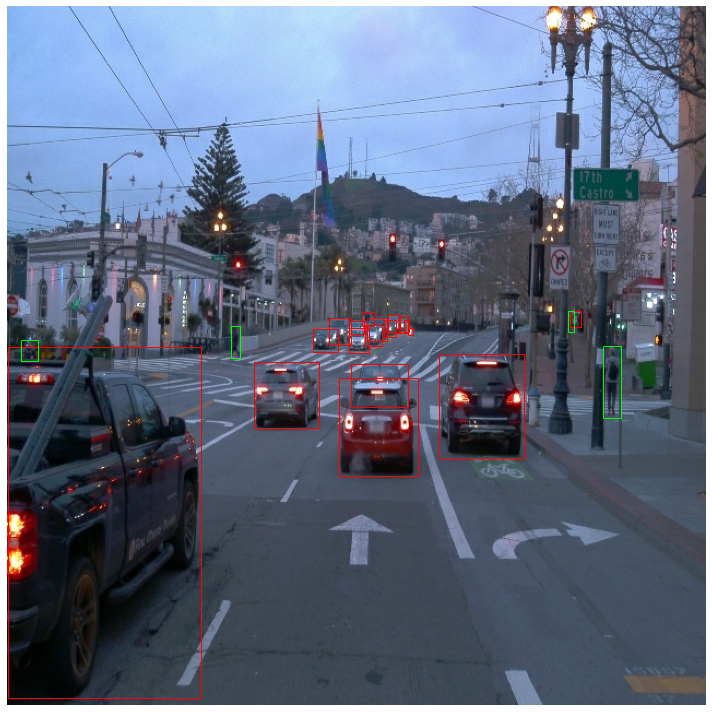

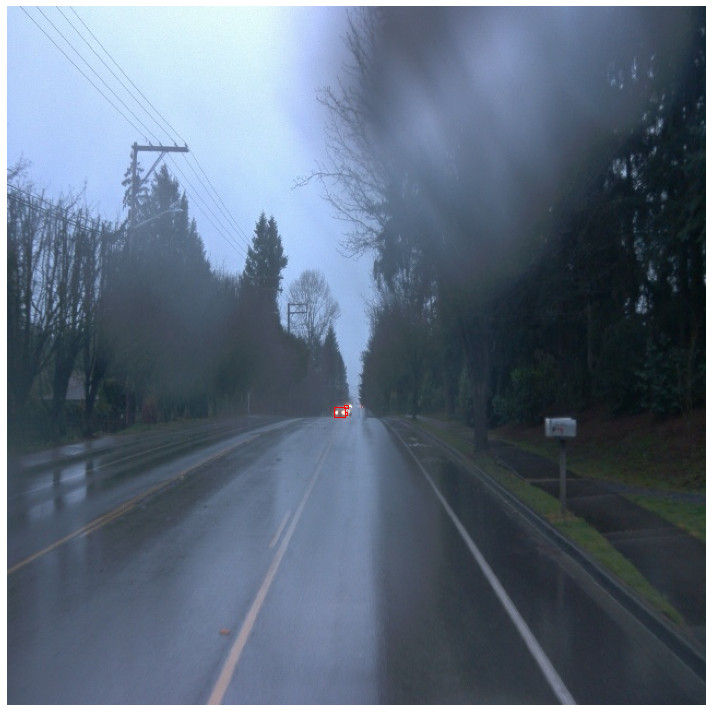

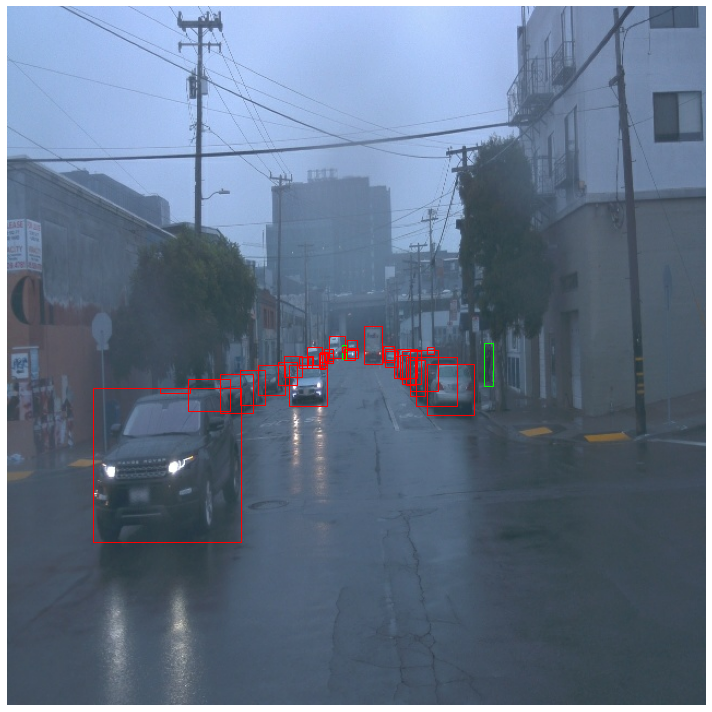

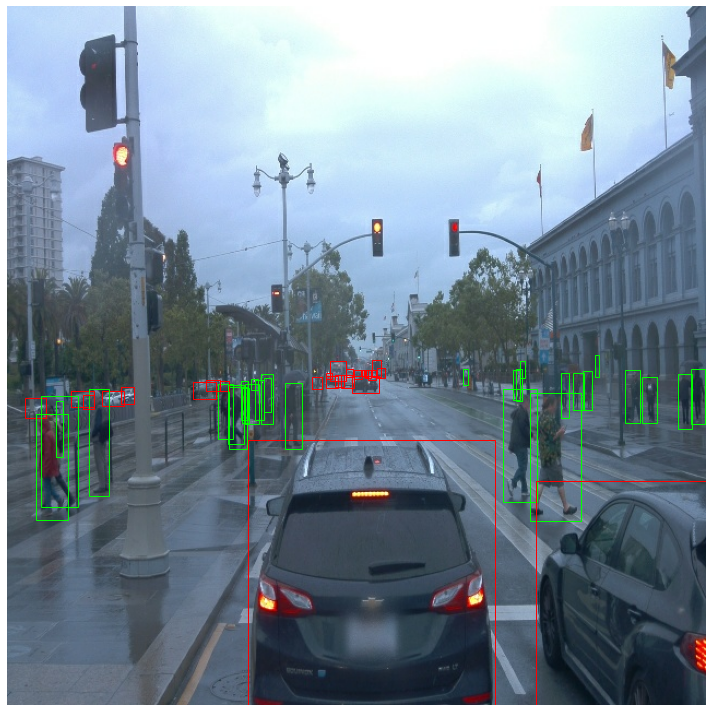

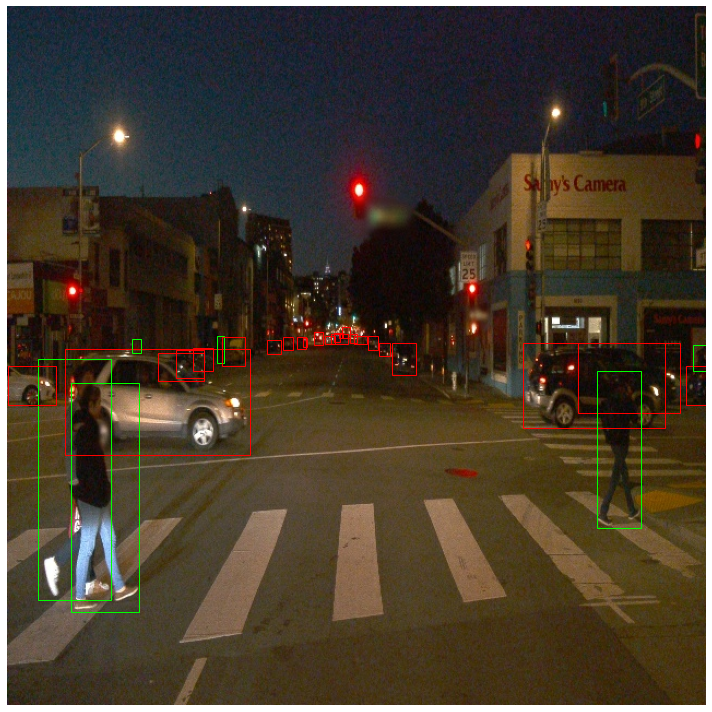

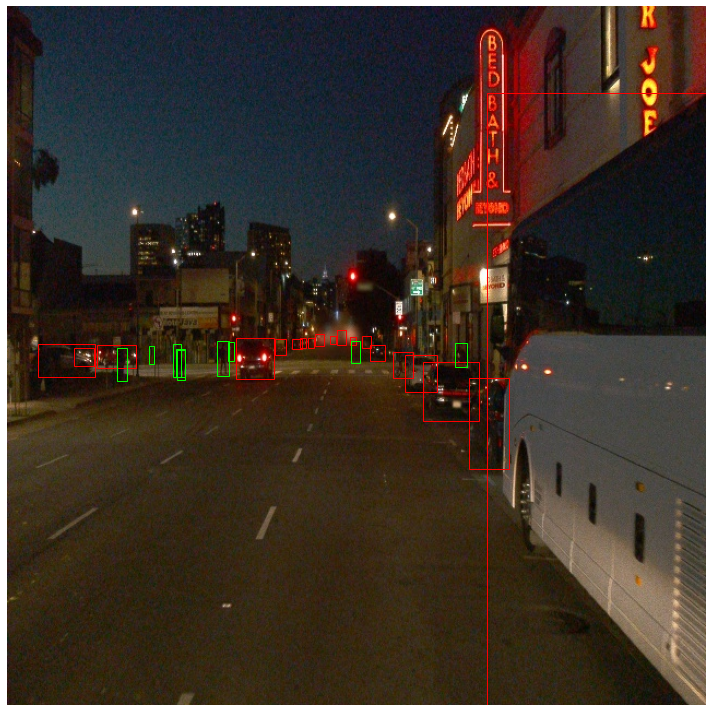

In [5]:
# Display 10 random images in dataset

for batch in dataset.shuffle(buffer_size=100).batch(1).take(10):
    display_images(batch)


In [ ]:
images in rainy nights caused false negative for car class. 
more cars are classified than what actually exist in traffic jams.